In [92]:
# import library yang digunakan
# from tensorflow.keras import layers
import tensorflow_datasets as tfds
import pandas as pd
from   tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

In [93]:
#membuat directory train dan test
base_dir = "/Users/bharata/Documents/model/train/Dataset/"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

In [94]:
#Menormalisasi gambar
from PIL import Image, ImageFile, ImageOps
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [95]:
train_tomato_bacterial_spot_dir = os.path.join("/Users/bharata/Documents/model/train/Dataset/train/train_tomato_bacterial_spot/")
train_tomato_bacterial_early_blight_dir = os.path.join("/Users/bharata/Documents/model/train/Dataset/train/train_tomato_early_blight/")

train_tomato_bacterial_spot_names = os.listdir(train_tomato_bacterial_spot_dir)
print(train_tomato_bacterial_spot_names[:10])
train_tomato_early_blight_names = os.listdir(train_tomato_bacterial_early_blight_dir)
print(train_tomato_early_blight_names[:10])


['image (1852).JPG', 'image (1501).JPG', 'image (1151).JPG', 'image (326).JPG', 'image (1444).JPG', 'image (633).JPG', 'image (263).JPG', 'image (1917).JPG', 'image (1297).JPG', 'image (2004).JPG']
['image (776).JPG', 'image (326).JPG', 'image (633).JPG', 'image (263).JPG', 'image (799).JPG', 'image (849).JPG', 'image (371).JPG', 'image (721).JPG', 'image (234).JPG', 'image (664).JPG']


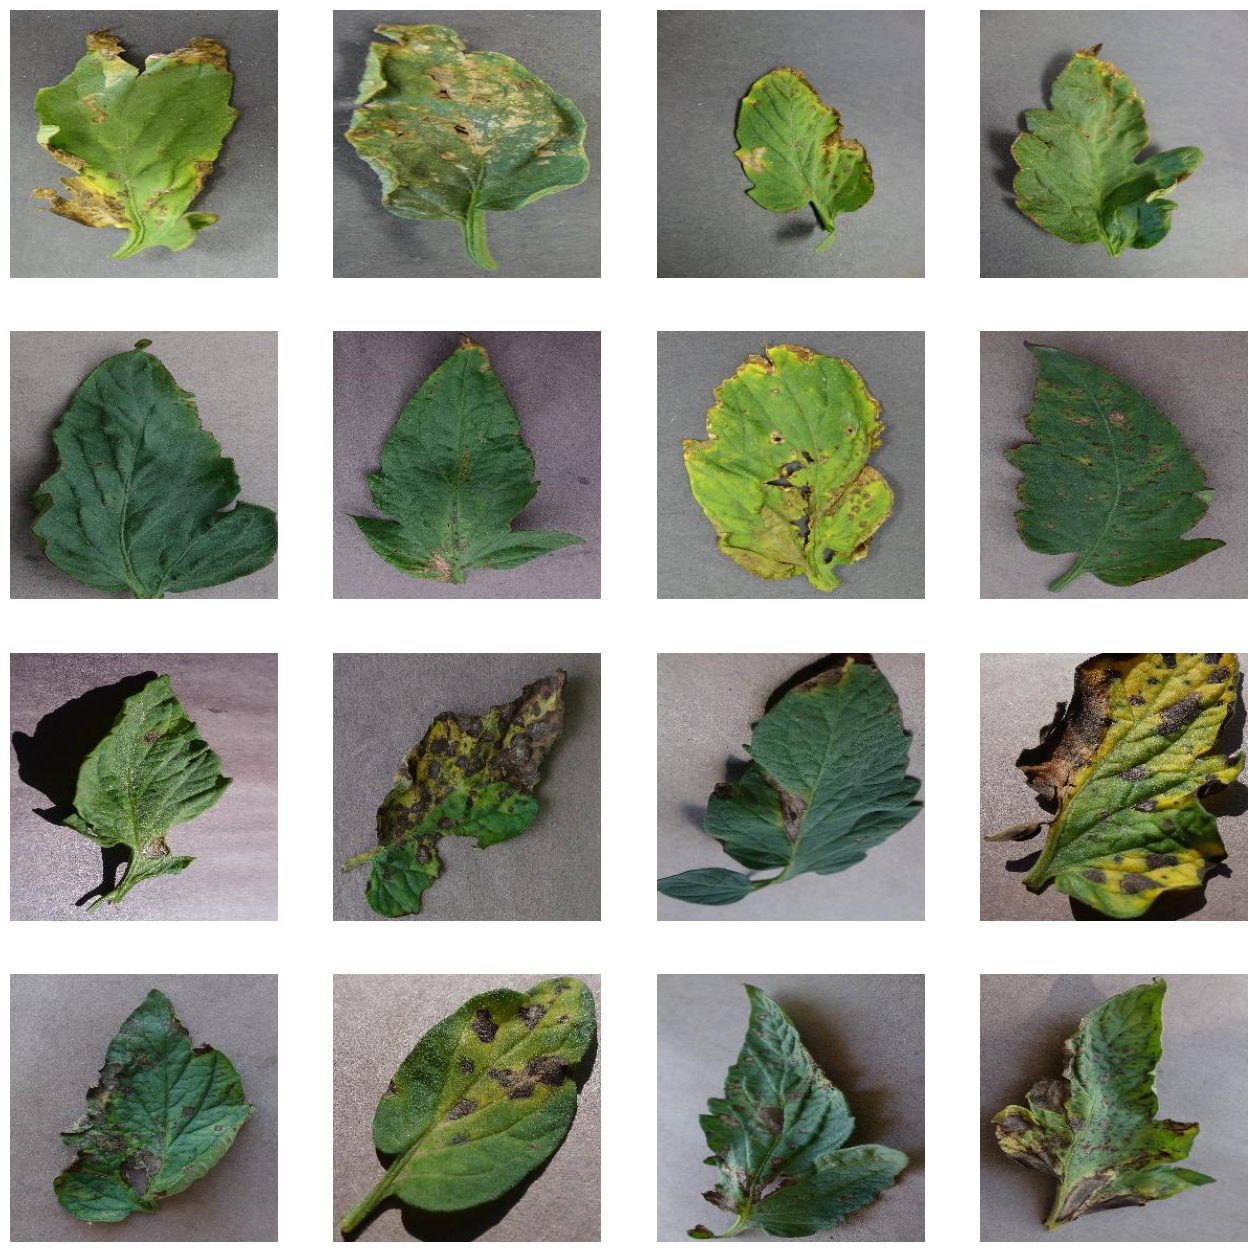

In [96]:
# Untuk menampilkkan dataset bacterial spot dan early blight
ncols = 4
nrows = 4
pic_index = 0

fig = plt.gcf()
pic_index += 8
fig.set_size_inches(ncols * 4, nrows * 4)
next_bacterial_spot_pix = [os.path.join(train_tomato_bacterial_spot_dir, fname)
                        for fname in train_tomato_bacterial_spot_names[pic_index-8:pic_index]]
next_early_blight_pix = [os.path.join(train_tomato_bacterial_early_blight_dir, fname)
                        for fname in train_tomato_early_blight_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_bacterial_spot_pix + next_early_blight_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [98]:
# normalisasi data gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalisasi data gambar dan augmentasi untuk data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalisasi data gambar untuk data validasi
test_datagen = ImageDataGenerator(rescale=1./255)

# Pengaturan generator data untuk pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

# Pengaturan generator data untuk validasi
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=128,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)


Found 16290 images belonging to 10 classes.
Found 1816 images belonging to 10 classes.


In [99]:
# lis kategori penyakit 

class_disease_dict  = train_generator.class_indices
classes_disease     = list(class_disease_dict.keys())
number_of_classes   = len(classes_disease)

print ("List Classes of Tomato Disease :", classes_disease)
print ("Class Dictionary of Tomato Disease :", class_disease_dict)
print ("Total of Disease Classes :", number_of_classes)

List Classes of Tomato Disease : ['train_tomato_bacterial_spot', 'train_tomato_early_blight', 'train_tomato_healthy', 'train_tomato_late_blight', 'train_tomato_leaf_mold', 'train_tomato_mosaic_virus', 'train_tomato_septoria_leaf_spot', 'train_tomato_spider_mites', 'train_tomato_target_spot', 'train_tomato_yellow_leaf_curl']
Class Dictionary of Tomato Disease : {'train_tomato_bacterial_spot': 0, 'train_tomato_early_blight': 1, 'train_tomato_healthy': 2, 'train_tomato_late_blight': 3, 'train_tomato_leaf_mold': 4, 'train_tomato_mosaic_virus': 5, 'train_tomato_septoria_leaf_spot': 6, 'train_tomato_spider_mites': 7, 'train_tomato_target_spot': 8, 'train_tomato_yellow_leaf_curl': 9}
Total of Disease Classes : 10


In [100]:
# train model 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.AveragePooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [101]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 average_pooling2d_10 (Avera  (None, 127, 127, 32)     0         
 gePooling2D)                                                    
                                                                 
 conv2d_34 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 average_pooling2d_11 (Avera  (None, 62, 62, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_35 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 average_pooling2d_12 (Avera  (None, 30, 30, 64)     

In [102]:
# compile model 
model.compile(
    loss='CategoricalCrossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])


In [103]:
# limit akurasi 

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        target_accuracy = 0.95
        if logs.get('accuracy') > target_accuracy and logs.get('val_accuracy') > target_accuracy:
            print(f"\nAccuracy has reached > {target_accuracy * 100}%!")
            self.model.stop_training = True

callbacks = myCallback()

In [18]:
# pengulangan pelatihan model yang sudah ada 

history = model.fit(
    train_generator,
    steps_per_epoch = 10,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [callbacks])

Epoch 1/50


2023-12-03 10:38:05.201720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-12-03 10:39:42.167106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 - 111s - loss: 2.7985 - accuracy: 0.1828 - val_loss: 2.0624 - val_accuracy: 0.2875 - 111s/epoch - 11s/step
Epoch 2/50
10/10 - 117s - loss: 1.9482 - accuracy: 0.3070 - val_loss: 1.8493 - val_accuracy: 0.3438 - 117s/epoch - 12s/step
Epoch 3/50
10/10 - 122s - loss: 1.7042 - accuracy: 0.4109 - val_loss: 1.5641 - val_accuracy: 0.4187 - 122s/epoch - 12s/step
Epoch 4/50
10/10 - 114s - loss: 1.4817 - accuracy: 0.4747 - val_loss: 1.2249 - val_accuracy: 0.5344 - 114s/epoch - 11s/step
Epoch 5/50
10/10 - 121s - loss: 1.2229 - accuracy: 0.5930 - val_loss: 1.2578 - val_accuracy: 0.5641 - 121s/epoch - 12s/step
Epoch 6/50
10/10 - 123s - loss: 1.1067 - accuracy: 0.6266 - val_loss: 1.0210 - val_accuracy: 0.6469 - 123s/epoch - 12s/step
Epoch 7/50
10/10 - 130s - loss: 0.9303 - accuracy: 0.6914 - val_loss: 0.8687 - val_accuracy: 0.7016 - 130s/epoch - 13s/step
Epoch 8/50
10/10 - 126s - loss: 0.7926 - accuracy: 0.7352 - val_loss: 0.7193 - val_accuracy: 0.7531 - 126s/epoch - 13s/step
Epoch 9/50
10/10 - 

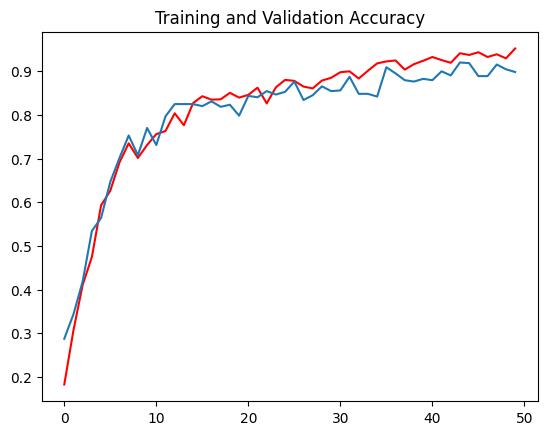

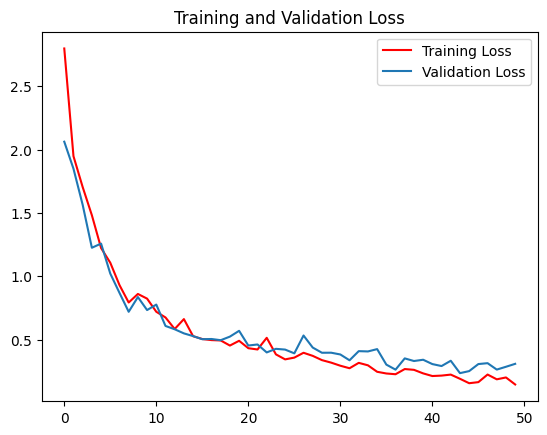

In [35]:
# menampilkan grafik akurasi dan loss menggunakan matplotlib

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [20]:
#from keras.models import load_model
import os
save_dir = "/Users/bharata/Desktop/model/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
model.save(save_dir + 'model.h5')